In [1]:
import os
import yolov5
import cv2
import matplotlib.pyplot as plt

/Users/danielevirzi/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
SAMPLE_ID = 1
IMAGE_PATH = f'data/images/plate.{SAMPLE_ID}.png'

In [3]:
# Load model
model = yolov5.load('keremberke/yolov5m-license-plate')
  
# Set model parameters
model.conf = 0.25  # NMS confidence threshold
model.iou = 0.45  # NMS IoU threshold
model.agnostic = False  # NMS class-agnostic
model.multi_label = False  # NMS multiple labels per box
model.max_det = 1000  # maximum number of detections per image

In [4]:
# Perform inference with test-time augmentation
results = model(IMAGE_PATH, augment=True)

# Parse results
predictions = results.pred[0]
boxes = predictions[:, :4]  # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# Load the image
image = cv2.imread(IMAGE_PATH)
if image is None:
    raise ValueError(f"Image not found at path: {IMAGE_PATH}")
image = image.copy()  # Ensure it's writable

# Draw bounding boxes on the image
for box, score, category in zip(boxes, scores, categories):
    x1, y1, x2, y2 = map(int, box)
    label = f"ID {int(category)}: {score:.2f}"
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)


print(f"Found {len(boxes)} license plates in the image")

Found 1 license plates in the image


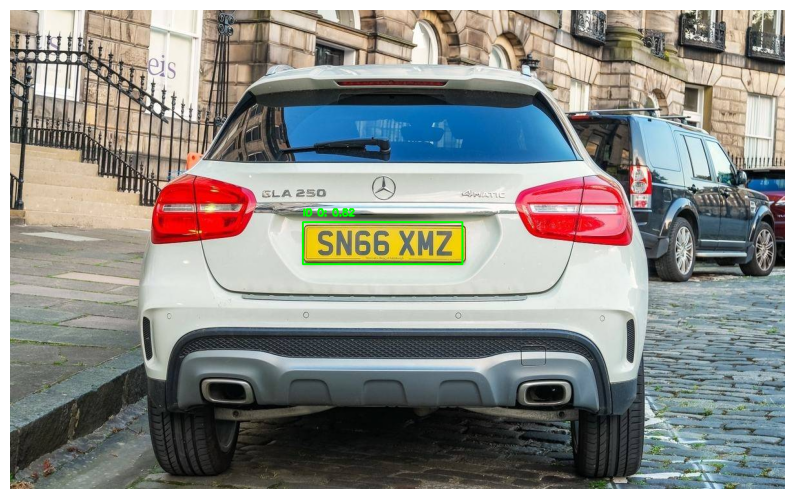

Saved manually drawn predictions to results/predictions/predictions.1.png


In [5]:
%matplotlib inline


# Display the image using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Save manually drawn results into "results/" folder if it doesn't exist
os.makedirs('results/predictions', exist_ok=True)
output_path = f'results/predictions/predictions.{SAMPLE_ID}.png'
cv2.imwrite(output_path, image)
print(f"Saved manually drawn predictions to {output_path}")

In [6]:
# Load the image and show the cropped license plate
image = cv2.imread(IMAGE_PATH)
license_plate = image[int(boxes[0][1]):int(boxes[0][3]), int(boxes[0][0]):int(boxes[0][2])]

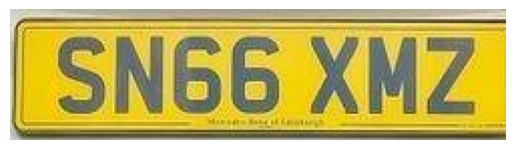

Saved cropped license plate to results/license_plates/license_plate.1.png


In [7]:
%matplotlib inline

# Display the cropped license plate
plt.imshow(cv2.cvtColor(license_plate, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



# Create a new folder "results/license_plates" if it does not exist
if not os.path.exists('results/license_plates'):
    os.makedirs('results/license_plates')
    
# Save the cropped license plate to "results/license_plates" folder
cv2.imwrite(f'results/license_plates/license_plate.{SAMPLE_ID}.png', license_plate)

print(f"Saved cropped license plate to results/license_plates/license_plate.{SAMPLE_ID}.png")